# Bank Marketing Dataset

### Introduction
The Dataset is attribute from “Bank Marketing” UCI dataset, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, which is related with direct marketing campaigns of banking institution.

### Why we do this?

The rising era of technological advancement has resulted in many great innovations. Many industries have begun to adapt and depend highly on technologies. Profit maximisation is certainly one of the main purposes of running a company. Thus in order for a company to increase profit, many strategies have been implemented to achieve it. The most common methods are cost control and working efficiency.

### Goal
The classification goal is to extract the possible range of potential customers by analyzing and predicting if client will subscribe a term deposit (variable y) using the bank dataset, and therefore increase company's profit.

### Understanding dataset
<br>
The data can be categorized into five new social and economic features/attributes.
<br>
<br>


Attributes Information:
### bank client data:
1 - age (numeric)
<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
<br>
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
<br>
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## First Insight

### Read data

Import CSV into dataframe.
<br>
Name the dataset as "Bankdata".

In [1]:
###import dataset (recommended)
##Call the location of the data file
#setwd(“C:/Users/Administrator/Desktop/bank-additional”)
#data=file.path("bank-additional",unzip("bank-additional.zip"))
#data
#Bankdata = read.csv("bank-additional/./bank-additional/bank-additional-full.csv" , sep = ";", header = TRUE)

setwd("C:/Users/fjiac/Desktop/R project")
Bankdata = read.csv("bank-additional-full.csv", sep = ";", header = TRUE)

### Library
Libraries needed in this project.

library(gmodels) #data visualization(cross table)
<br>
library(polycor) #to find correlation 
<br>
library(dplyr) #stratified sampling
<br>
library(ggplot2) #to plot charts
<br>
library(splitstackshape) #stratified sampling
<br>
library(e1071) #Naive Bayes
<br>
library(tree) #Decision Tree
<br>
library(randomForest)

### Visualize data

Library needed to do preview the summary of data.

In [2]:
library(gmodels)

Warning message:
"package 'gmodels' was built under R version 3.6.3"


Variables of data.

In [3]:
names(Bankdata)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

Display the dimension of the dataset.

In [4]:
dim(Bankdata)

[1] 41188    21

The set of data consists of 41,188 variables and 21 variables.
<br>

Statistical Summary of the data

In [5]:
summary(Bankdata)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

NA can be observed in all 4 attributes, which are "job", "marital", "education", "default", "housing", "loan".
<br>

Overview of the data type of all variables.

In [6]:
str(Bankdata)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

Cross table for the Bankfull data.

In [7]:
CrossTable(Bankdata$y)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  41188 

 
          |        no |       yes | 
          |-----------|-----------|
          |     36548 |      4640 | 
          |     0.887 |     0.113 | 
          |-----------|-----------|



 


There are 36548(No) and 4640(Yes) at a ratio of approximately 9:1.
<br>

## Data Cleaning

### Data validation

Check for Duplicate Rows

In [8]:
sum(duplicated(Bankdata))

[1] 12

Check how many rows contain Missing Data

In [9]:
sum(!complete.cases(Bankdata))

[1] 0

Calculate the number of cell with "unknown".

In [10]:
sum(Bankdata=="unknown")

[1] 12718

The total number of cells with "unknown" value is 12,718, which will need to be cleaned from dataset.
<br>

### Data cleaning process

Library needed in order to do data cleaning.

In [11]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Replace "numeric" y to "categorical" variable y

Convert the y variable to 1(Yes) or 0(No).

In [12]:
y = ifelse(Bankdata$y=="yes", 1, 0)

Change the numeric variable y to categorical variable.

In [13]:
y = as.factor(y)
summary(y)

0     1 
36548  4640

Output "y" successfully changed from categorical to binary data for ease of statistical calculation.
<br>

Remove old categorical variable "y" and merge the new binary data "y" with "Bankdata" dataset.

In [14]:
Bankdata = Bankdata %>% select(-y)
Bankdata = data.frame(Bankdata, y)

Preview the summary and data type of the new dataset "Bankdata".

In [15]:
summary(Bankdata)
str(Bankdata)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

### Convert "unknown" to NA, remove the whole row which contains NA.

As the variables (job, marital, default, education, housing, loan) contain "unknown", we first check the position of the "unknown" inside the variable.

In [16]:
levels(Bankdata$job)
levels(Bankdata$marital)
levels(Bankdata$education)
levels(Bankdata$default)
levels(Bankdata$housing)
levels(Bankdata$loan)

[1] "admin."        "blue-collar"   "entrepreneur"  "housemaid"    
 [5] "management"    "retired"       "self-employed" "services"     
 [9] "student"       "technician"    "unemployed"    "unknown"

[1] "divorced" "married"  "single"   "unknown"

[1] "basic.4y"            "basic.6y"            "basic.9y"           
[4] "high.school"         "illiterate"          "professional.course"
[7] "university.degree"   "unknown"

[1] "no"      "unknown" "yes"

[1] "no"      "unknown" "yes"

[1] "no"      "unknown" "yes"

Replace the unknown with NA according to the position.

In [17]:
levels(Bankdata$job)[12] = NA
levels(Bankdata$marital)[4] = NA
levels(Bankdata$education)[8] = NA
levels(Bankdata$default)[2] = NA
levels(Bankdata$housing)[2] = NA
levels(Bankdata$loan)[2] = NA

Remove the whole row that contains NA.

In [18]:
Bankdata = Bankdata[complete.cases(Bankdata),]

Verify the data cleaning process.

In [19]:
summary(Bankdata)

      age                 job           marital     
 Min.   :17.00   admin.     :8737   divorced: 3553  
 1st Qu.:31.00   blue-collar:5675   married :17492  
 Median :37.00   technician :5473   single  : 9443  
 Mean   :39.03   services   :2857                   
 3rd Qu.:45.00   management :2311                   
 Max.   :95.00   retired    :1216                   
                 (Other)    :4219                   
               education     default     housing      loan      
 basic.4y           : 2380   no :30485   no :13967   no :25720  
 basic.6y           : 1389   yes:    3   yes:16521   yes: 4768  
 basic.9y           : 4276                                      
 high.school        : 7699                                      
 illiterate         :   11                                      
 professional.course: 4321                                      
 university.degree  :10412                                      
      contact          month      day_of_week    duratio

Note: The rows with unknown have successfully removed. 

Review the data type to do statistical test.

In [20]:
str(Bankdata)

'data.frame':	30488 obs. of  21 variables:
 $ age           : int  56 37 40 56 59 24 25 25 29 57 ...
 $ job           : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 1 8 1 10 8 8 2 4 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 3 3 3 3 1 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 4 2 4 6 6 4 4 4 1 ...
 $ default       : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ housing       : Factor w/ 2 levels "no","yes": 1 2 1 1 1 2 2 2 1 2 ...
 $ loan          : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 226 151 307 139 380 50 222 137 293 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 9

Plot chart for variable "age" and "campaign" with respect to output "y".

Library needed to construct charts.

In [21]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



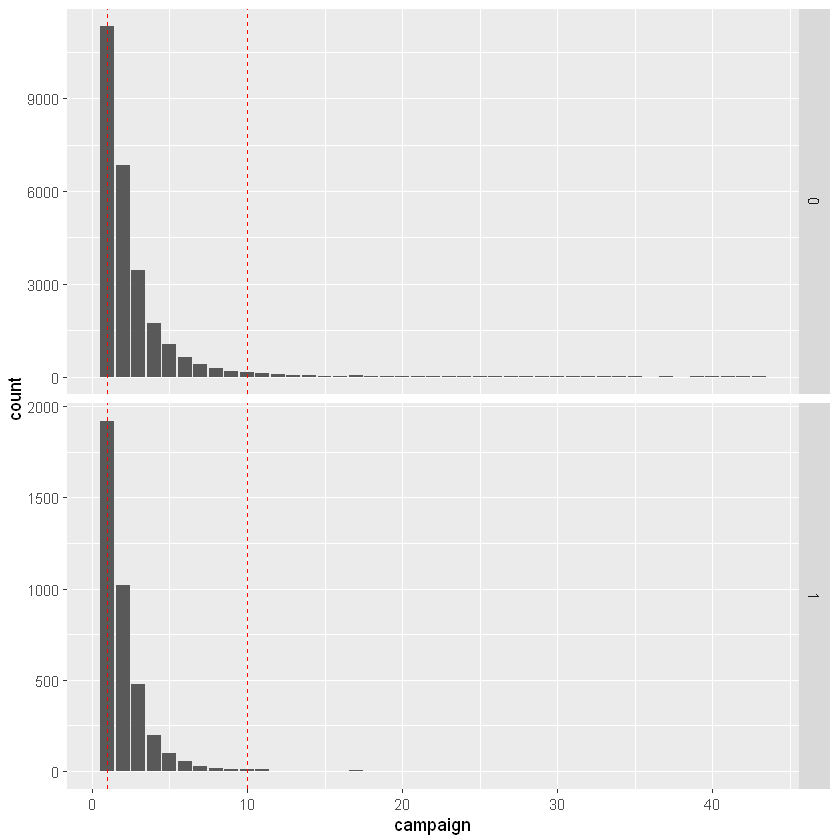

In [22]:
Bankdata %>%
ggplot()+aes(x=campaign)+geom_bar()+geom_vline(xintercept=c(1,10),col="red",linetype="dashed")+facet_grid(y~.,scales="free_y")

We observed that the most clients participated in the first few campaigns and it is showing a decreasing trend. As the number of campaigns held increases, the rejection rate also increases accordingly. It might be because the potential clients had subscribed in the first few campaigns and only left only those who showed no interest and rejected it

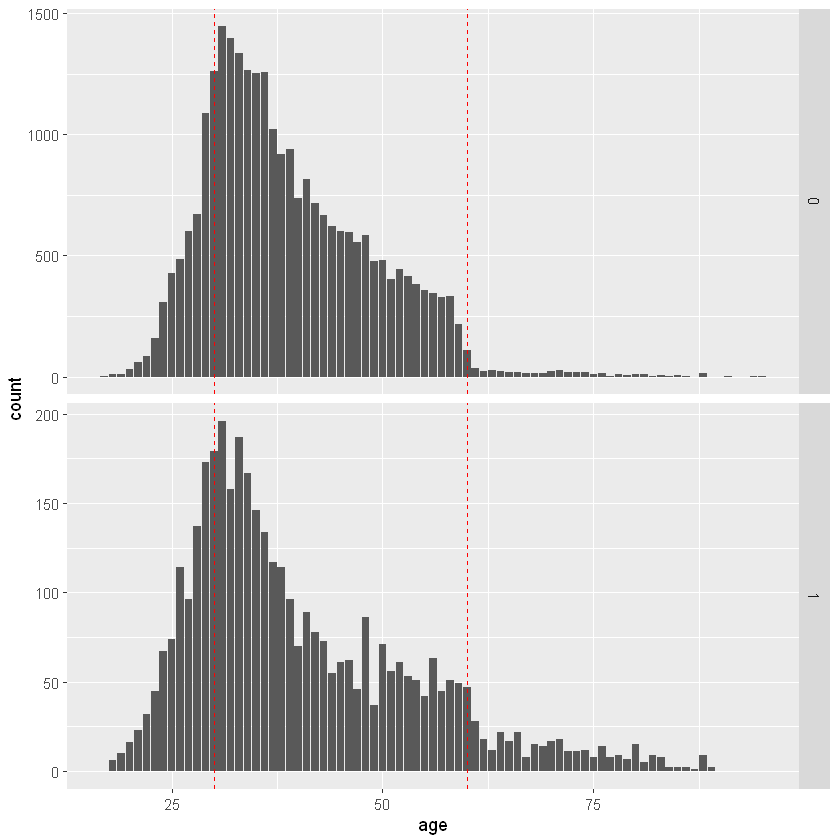

In [23]:
Bankdata %>%
ggplot()+aes(x=age)+geom_bar()+geom_vline(xintercept=c(30,60),col="red",linetype="dashed")+facet_grid(y~.,scales="free_y")

## Correlation 
Take into consideration of those significant explanatory variables by finding the correlation between the explanatory variable and other variables.
<br>
Consider less correlation variable as insignificant variable and remove it afterwards.

Use Chi Square test, cross table or construct a heterogenous correlation matrix to find correlation.

Create a function for Cross table.

In [24]:
crosstable = function(df, var1, var2){
# df: dataframe containing both variables to cross
# var1, var2: columns to cross together.
CrossTable(df[, var1], df[, var2],
prop.r = T,
prop.c = F,
prop.t = F,
prop.chisq = F,
dnn = c(var1, var2))
}

Construct appropriate correlation test for each variables.

#### Renamed variables' value
##### Age
The age group of the dataset ranges from 17 to 95 and the mean of the age is 39.03. In order to simplify the calculation, we took the step to classify those below age 30 as low and mid if lower than age 60 and high thereafter.
##### Campaign 
If the campaigns organized more than 10 times, we denote it as '10+' for further anaylsis.
##### Previous 
If the number of contacts performed before this campaign for this client more than 2 times, we denote it as '2+' for ease of analysis.

In [25]:
#age
table(Bankdata$age)
#to construct a nicer cross table
Bankdata=Bankdata %>% mutate(age=ifelse(age > 60,"high",ifelse(age>30,"mid","low")))
Bankdata$age <- factor(Bankdata$age, levels= c("low", "mid", "high"))
crosstable(Bankdata, "age", "y")


#Job
table(Bankdata$job)
crosstable(Bankdata, "job", "y")
chisq.test(Bankdata$job, Bankdata$y)


#Marital Status
table(Bankdata$marital)
crosstable(Bankdata, "marital", "y") 
chisq.test(Bankdata$marital, Bankdata$y)

#Education
table(Bankdata$education)
crosstable(Bankdata, "education", "y")

#Default
table(Bankdata$default)
crosstable(Bankdata, "default", "y")
names(Bankdata)
#Remove "default" variable due to only three people replied yes so remove whole variable
Bankdata = Bankdata %>% select(-default)

#Housing
table(Bankdata$housing)
crosstable(Bankdata, "housing", "y")
chisq.test(Bankdata$housing, Bankdata$y)
#Remove "housing" variable due to the high p-value 0.08
Bankdata = Bankdata %>% select(-housing) 

#Loan 
table(Bankdata$loan)
crosstable(Bankdata, "loan", "y")
chisq.test(Bankdata$loan, Bankdata$y)
names(Bankdata)
#Remove "loan" due to high p-value 0.39
Bankdata = Bankdata %>% select(-loan)

#Contact
table(Bankdata$contact)
crosstable(Bankdata, "contact", "y")
chisq.test(Bankdata$contact, Bankdata$y)

#Month
table(Bankdata$month)
#To construct a nicer cross table
months= c("jan"="Jan","feb"="Feb","mar"="Mar","apr"="Apr","may"="May","jun"="Jun","jul"="Jul","aug"="Aug","sep"="Sep","oct"="Oct","nov"="Nov","dec"="Dec")
Bankdata = Bankdata %>% mutate(month=recode(month,!!!months))
#Arrange the factors
Bankdata$month <- factor(Bankdata$month, levels= c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
crosstable(Bankdata, "month", "y")
chisq.test(Bankdata$month, Bankdata$y)

#Day
table(Bankdata$day_of_week)
#To construct a nicer cross table
days=c("mon"="Mon","tue"="Tue","wed"="Wed","thu"="Thu","fri"="Fri")
Bankdata=Bankdata %>% mutate(day_of_week=recode(day_of_week,!!!days))
#Arrange the factors
Bankdata$day_of_week <- factor(Bankdata$day_of_week, levels= c("Mon", "Tue", "Wed", "Thu", "Fri"))
crosstable(Bankdata, "day_of_week", "y")
chisq.test(Bankdata$day_of_week, Bankdata$y)

#Duration
#unnecessary for our testing
Bankdata=Bankdata %>% select(-duration)

#Campaign 
Bankdata = Bankdata %>% mutate(campaign = ifelse(campaign >= 10, "10+", campaign))
Bankdata$campaign <- factor(Bankdata$campaign, levels= c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"))
crosstable(Bankdata, "campaign", "y")

#pdays 
table(Bankdata$pdays)
#Replace the values of the variable
Bankdata=Bankdata %>% mutate(pdays=ifelse(pdays==999,"0","1"))
names(Bankdata)
crosstable(Bankdata, "pdays", "y")


#previous
table(Bankdata$previous)
Bankdata=Bankdata %>% mutate(previous = ifelse(previous >= 2, "2+" , ifelse(previous == 1, "1" , "0")))
crosstable(Bankdata,"previous","y")

#poutcome
crosstable(Bankdata,"poutcome","y")


  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   2   15   21   47   84  115  205  375  500  599  699  809 1263 1441 1643 1555 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
1524 1431 1399 1391 1140 1033 1035  807  906  793  741  677  664  659  600  670 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 516  552  460  506  469  432  400  407  372  383  266  156   64   42   41   45 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  36   40   21   30   30   41   46   28   28   29   20   28   12   20   12   26 
  81   82   83   84   85   86   87   88   89   91   94   95 
  16   13   15    4    7    3    1   22    2    2    1    1 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
         age |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
         low |      5203 |       972 |      6175 | 
             |     0.843 |     0.157 |     0.203 | 
-------------|-----------|-----------|-----------|
         mid |     21026 |      2561 |     23587 | 
             |     0.891 |     0.109 |     0.774 | 
-------------|-----------|-----------|-----------|
        high |       400 |       326 |       726 | 
             |     0.551 |     0.449 |     0.024 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



       admin.   blue-collar  entrepreneur     housemaid    management 
         8737          5675          1089           690          2311 
      retired self-employed      services       student    technician 
         1216          1092          2857           610          5473 
   unemployed 
          738 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
              | y 
          job |         0 |         1 | Row Total | 
--------------|-----------|-----------|-----------|
       admin. |      7521 |      1216 |      8737 | 
              |     0.861 |     0.139 |     0.287 | 
--------------|-----------|-----------|-----------|
  blue-collar |      5223 |       452 |      5675 | 
              |     0.920 |     0.080 |     0.186 | 
--------------|-----------|-----------|-----------|
 entrepreneur |       988 |       101 |      1089 | 
              |     0.907 |     0.093 |     0.036 | 
--------------|-----------|-----------|-----------|
    housemaid |       603 |        87 |       690 | 
              |     0.874 |     0.126 |     0.023 | 
--------------|-----------|-----------|-----------|
   management |      2025 |       286 |      2311 | 
              | 


	Pearson's Chi-squared test

data:  Bankdata$job and Bankdata$y
X-squared = 730.22, df = 10, p-value < 2.2e-16



divorced  married   single 
    3553    17492     9443 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
     marital |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
    divorced |      3143 |       410 |      3553 | 
             |     0.885 |     0.115 |     0.117 | 
-------------|-----------|-----------|-----------|
     married |     15436 |      2056 |     17492 | 
             |     0.882 |     0.118 |     0.574 | 
-------------|-----------|-----------|-----------|
      single |      8050 |      1393 |      9443 | 
             |     0.852 |     0.148 |     0.310 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



	Pearson's Chi-squared test

data:  Bankdata$marital and Bankdata$y
X-squared = 54.394, df = 2, p-value = 1.544e-12



           basic.4y            basic.6y            basic.9y         high.school 
               2380                1389                4276                7699 
         illiterate professional.course   university.degree 
                 11                4321               10412 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
                    | y 
          education |         0 |         1 | Row Total | 
--------------------|-----------|-----------|-----------|
           basic.4y |      2054 |       326 |      2380 | 
                    |     0.863 |     0.137 |     0.078 | 
--------------------|-----------|-----------|-----------|
           basic.6y |      1253 |       136 |      1389 | 
                    |     0.902 |     0.098 |     0.046 | 
--------------------|-----------|-----------|-----------|
           basic.9y |      3896 |       380 |      4276 | 
                    |     0.911 |     0.089 |     0.140 | 
--------------------|-----------|-----------|-----------|
        high.school |      6765 |       934 |      7699 | 
                    |     0.879 |     0.121 |     0.253 | 
--------------------|-----------|----


   no   yes 
30485     3 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
     default |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
          no |     26626 |      3859 |     30485 | 
             |     0.873 |     0.127 |     1.000 | 
-------------|-----------|-----------|-----------|
         yes |         3 |         0 |         3 | 
             |     1.000 |     0.000 |     0.000 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 


[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"


   no   yes 
13967 16521 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
     housing |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
          no |     12250 |      1717 |     13967 | 
             |     0.877 |     0.123 |     0.458 | 
-------------|-----------|-----------|-----------|
         yes |     14379 |      2142 |     16521 | 
             |     0.870 |     0.130 |     0.542 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



	Pearson's Chi-squared test with Yates' continuity correction

data:  Bankdata$housing and Bankdata$y
X-squared = 3.0316, df = 1, p-value = 0.08166



   no   yes 
25720  4768 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
        loan |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
          no |     22446 |      3274 |     25720 | 
             |     0.873 |     0.127 |     0.844 | 
-------------|-----------|-----------|-----------|
         yes |      4183 |       585 |      4768 | 
             |     0.877 |     0.123 |     0.156 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



	Pearson's Chi-squared test with Yates' continuity correction

data:  Bankdata$loan and Bankdata$y
X-squared = 0.72915, df = 1, p-value = 0.3932


[1] "age"            "job"            "marital"        "education"     
 [5] "loan"           "contact"        "month"          "day_of_week"   
 [9] "duration"       "campaign"       "pdays"          "previous"      
[13] "poutcome"       "emp.var.rate"   "cons.price.idx" "cons.conf.idx" 
[17] "euribor3m"      "nr.employed"    "y"


 cellular telephone 
    20443     10045 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
     contact |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
    cellular |     17170 |      3273 |     20443 | 
             |     0.840 |     0.160 |     0.671 | 
-------------|-----------|-----------|-----------|
   telephone |      9459 |       586 |     10045 | 
             |     0.942 |     0.058 |     0.329 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



	Pearson's Chi-squared test with Yates' continuity correction

data:  Bankdata$contact and Bankdata$y
X-squared = 630.04, df = 1, p-value < 2.2e-16



 apr  aug  dec  jul  jun  mar  may  nov  oct  sep 
2115 4673  157 5081 3614  482 9733 3496  642  495 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
       month |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
         Mar |       236 |       246 |       482 | 
             |     0.490 |     0.510 |     0.016 | 
-------------|-----------|-----------|-----------|
         Apr |      1647 |       468 |      2115 | 
             |     0.779 |     0.221 |     0.069 | 
-------------|-----------|-----------|-----------|
         May |      9033 |       700 |      9733 | 
             |     0.928 |     0.072 |     0.319 | 
-------------|-----------|-----------|-----------|
         Jun |      3162 |       452 |      3614 | 
             |     0.875 |     0.125 |     0.119 | 
-------------|-----------|-----------|-----------|
         Jul |      4569 |       512 |      5081 | 
             |     0.899 |     0


	Pearson's Chi-squared test

data:  Bankdata$month and Bankdata$y
X-squared = 2358.8, df = 9, p-value < 2.2e-16



 fri  mon  thu  tue  wed 
5734 6279 6395 5955 6125 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
 day_of_week |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
         Mon |      5573 |       706 |      6279 | 
             |     0.888 |     0.112 |     0.206 | 
-------------|-----------|-----------|-----------|
         Tue |      5166 |       789 |      5955 | 
             |     0.868 |     0.132 |     0.195 | 
-------------|-----------|-----------|-----------|
         Wed |      5316 |       809 |      6125 | 
             |     0.868 |     0.132 |     0.201 | 
-------------|-----------|-----------|-----------|
         Thu |      5516 |       879 |      6395 | 
             |     0.863 |     0.137 |     0.210 | 
-------------|-----------|-----------|-----------|
         Fri |      5058 |       676 |      5734 | 
             |     0.882 |     0


	Pearson's Chi-squared test

data:  Bankdata$day_of_week and Bankdata$y
X-squared = 25.669, df = 4, p-value = 3.689e-05



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
    campaign |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     11326 |      1920 |     13246 | 
             |     0.855 |     0.145 |     0.434 | 
-------------|-----------|-----------|-----------|
           2 |      6853 |      1020 |      7873 | 
             |     0.870 |     0.130 |     0.258 | 
-------------|-----------|-----------|-----------|
           3 |      3428 |       477 |      3905 | 
             |     0.878 |     0.122 |     0.128 | 
-------------|-----------|-----------|-----------|
           4 |      1737 |       200 |      1937 | 
             |     0.897 |     0.103 |     0.064 | 
-------------|-----------|-----------|-----------|
           5 |      1055 |       101 |      1156 | 
             |     0.913 |     0


    0     1     2     3     4     5     6     7     8     9    10    11    12 
   14    21    53   381   102    43   363    50    13    53    40    25    50 
   13    14    15    16    17    18    19    21    22    25    26    27   999 
   33    17    22     8     6     5     3     2     3     1     1     1 29178 

[1] "age"            "job"            "marital"        "education"     
 [5] "contact"        "month"          "day_of_week"    "campaign"      
 [9] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[13] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[17] "y"


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
       pdays |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     26158 |      3020 |     29178 | 
             |     0.896 |     0.104 |     0.957 | 
-------------|-----------|-----------|-----------|
           1 |       471 |       839 |      1310 | 
             |     0.360 |     0.640 |     0.043 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 



    0     1     2     3     4     5     6     7 
25836  3752   633   190    56    16     4     1 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  30488 

 
             | y 
    previous |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     23264 |      2572 |     25836 | 
             |     0.900 |     0.100 |     0.847 | 
-------------|-----------|-----------|-----------|
           1 |      2920 |       832 |      3752 | 
             |     0.778 |     0.222 |     0.123 | 
-------------|-----------|-----------|-----------|
          2+ |       445 |       455 |       900 | 
             |     0.494 |     0.506 |     0.030 | 
-------------|-----------|-----------|-----------|
Column Total |     26629 |      3859 |     30488 | 
-------------|-----------|-----------|-----------|

 

 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|



#### Analysis from the Cross Table
##### Age 
we noticed that the highest acceptance rate came from the middle age group with about 66.49% of them. Oppositely, the group which rejects the most is from the middle age group at about 78.96%.
##### Job 
We observed that most of the clients worked as admin. (8737), followed by blue-collar (5675), then technician (5473) and further on. We found that according to their distribution, the highest acceptance rate occurs within students while the highest rejection rate occurs in blue-collar.
#####  Marital
There are 17492 whose marital status is married, 9443 remained single and the remaining 3553 divorced. Despite the huge difference between each status, the rejection rate for each of them is somewhat similar, which is above and around 85% rejection.
##### Education
The highest acceptance rate is from the illiterate level which is 27.3% whereas the highest rejection rate is 91.1% from the basic.9y level.
##### Contact 
This variable only has 2 records, that is cellular and telephone which has 20443 and 10045 records respectively. The communication using cellular has a successful rate of 16% while the failure rate of using telephone is 94.2%.
##### Month 
The most frequent contact occurred in May which has 9733 cases while the least of it is in December, about 157 cases. This also implies that the data in May alone explains about 30% of the whole year which is more convincing. In May, the rejection rate was 92.8% unlike the 52.9% rejection rate in December which only represented 0.5% of the whole year's data.
##### Day of Week
The data of this variable are distributed almost evenly for the five day. The rejection rate of each day is also quite stable, which is around 86%-88%.
##### Pdays
The pdays help us to find out who are new potential clients and clients that were contacted before. The new potential clients consist of 95.7% of the whole data and their rejection rate is at 89.6%. However, the clients that were previously contacted had a 64% success rate. This tells us that clients might not accept it at first, but they will be more likely to subscribe to it as they were contacted again. This can be seen through the variable “previous”. The acceptance rate increases as the number of contacts increases.

##### Therefore, we removed variables due to the reason below:
<br>
"__default__": almost one-sided response for "y" variable lead to insignificancy
<br>
"__housing__": high p-value 0.08
<br>
"__loan__": high p-value 0.39
<br>
"__duration__": unnecessary for our testing (doesn't fully determine our goal)

### Remove insignificant variables from group 3 by checking their correlation

Library needed to do correlation checking.

In [26]:
library(polycor)

Warning message:
"package 'polycor' was built under R version 3.6.3"


Check correlation between variables in Group 3 with the response variable.

In [27]:
Bankdata %>% select(emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) %>% hetcor()


Two-Step Estimates

Correlations/Type of Correlation:
               emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.employed
emp.var.rate              1        Pearson       Pearson   Pearson     Pearson
cons.price.idx       0.7661              1       Pearson   Pearson     Pearson
cons.conf.idx        0.1576        0.02722             1   Pearson     Pearson
euribor3m            0.9694         0.6673        0.2436         1     Pearson
nr.employed          0.9004         0.4889       0.07528    0.9449           1

Standard Errors:
               emp.var.rate cons.price.idx cons.conf.idx euribor3m
emp.var.rate                                                      
cons.price.idx     0.002366                                       
cons.conf.idx      0.005585       0.005723                        
euribor3m          0.000345       0.003177      0.005387          
nr.employed        0.001084       0.004358      0.005695 0.0006141

n = 30488 

P-values for Tests of Bivariate Normal

#### Analysis from the Cross Table
##### Emp.var.rate
Employment variation rate has a negative influence on the objective. The change in employment rate will make customers less likely to subscribe to a term deposit.
##### Cons.price.idx
Consumer price index(CPI) helps us examine the changes in price levels of the weighted average of prices of a basket of consumer goods and services. It has a negative influence on the objective. When Consumer price index(CPI) increases means purchasing power increases that overall leads to a decrease of customer subscribe to bank deposit. 
##### Euribor3m
Euribor 3 month rate is known as the three month rate for the Euro Interbank Offered Rate. It is the reference rate based on the averaged interest rate at which Eurozone banks offer to lend unsecured funds to other banks in the money market.
##### Nr.employed
This is the number of employees in the bank, having a positive effect for turning people to subscribe to the term deposit. This can result from the fact that the more the employees in the bank, the more influential and prestigious the bank will be.


"cons.conf.idx" shows low correlation between social and economic indicators.
<br>
Remove variable "cons.conf.idx" from group 3 due to the low correlation.

In [28]:
Bankdata = Bankdata %>% select(-cons.conf.idx)

## Cleaned data display 
Preview the cleaned data.

In [29]:
names(Bankdata)
summary(Bankdata)
str(Bankdata)

[1] "age"            "job"            "marital"        "education"     
 [5] "contact"        "month"          "day_of_week"    "campaign"      
 [9] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[13] "cons.price.idx" "euribor3m"      "nr.employed"    "y"

   age                 job           marital                    education    
 low : 6175   admin.     :8737   divorced: 3553   basic.4y           : 2380  
 mid :23587   blue-collar:5675   married :17492   basic.6y           : 1389  
 high:  726   technician :5473   single  : 9443   basic.9y           : 4276  
              services   :2857                    high.school        : 7699  
              management :2311                    illiterate         :   11  
              retired    :1216                    professional.course: 4321  
              (Other)    :4219                    university.degree  :10412  
      contact          month      day_of_week    campaign    
 cellular :20443   May    :9733   Mon:6279    1      :13246  
 telephone:10045   Jul    :5081   Tue:5955    2      : 7873  
                   Aug    :4673   Wed:6125    3      : 3905  
                   Jun    :3614   Thu:6395    4      : 1937  
                   Nov    :3496   Fri:5734    5      : 1156  
    

'data.frame':	30488 obs. of  16 variables:
 $ age           : Factor w/ 3 levels "low","mid","high": 2 2 2 2 2 1 1 1 1 2 ...
 $ job           : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 1 8 1 10 8 8 2 4 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 3 3 3 3 1 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 4 2 4 6 6 4 4 4 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 12 levels "Jan","Feb","Mar",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ day_of_week   : Factor w/ 5 levels "Mon","Tue","Wed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ campaign      : Factor w/ 10 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : chr  "0" "0" "0" "0" ...
 $ previous      : chr  "0" "0" "0" "0" ...
 $ poutcome      : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.price.idx: num  9

Convert the data type of variables (age, pdays, previous, campaign) from character to categorical variable.

In [30]:
Bankdata$age = as.factor(Bankdata$age)
Bankdata$pdays = as.factor(Bankdata$pdays)
Bankdata$previous = as.factor(Bankdata$previous)
Bankdata$campaign = as.factor(Bankdata$campaign)

Display data.

In [31]:
summary(Bankdata)
str(Bankdata)

   age                 job           marital                    education    
 low : 6175   admin.     :8737   divorced: 3553   basic.4y           : 2380  
 mid :23587   blue-collar:5675   married :17492   basic.6y           : 1389  
 high:  726   technician :5473   single  : 9443   basic.9y           : 4276  
              services   :2857                    high.school        : 7699  
              management :2311                    illiterate         :   11  
              retired    :1216                    professional.course: 4321  
              (Other)    :4219                    university.degree  :10412  
      contact          month      day_of_week    campaign     pdays    
 cellular :20443   May    :9733   Mon:6279    1      :13246   0:29178  
 telephone:10045   Jul    :5081   Tue:5955    2      : 7873   1: 1310  
                   Aug    :4673   Wed:6125    3      : 3905            
                   Jun    :3614   Thu:6395    4      : 1937            
                

'data.frame':	30488 obs. of  16 variables:
 $ age           : Factor w/ 3 levels "low","mid","high": 2 2 2 2 2 1 1 1 1 2 ...
 $ job           : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 1 8 1 10 8 8 2 4 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 3 3 3 3 1 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 4 2 4 6 6 4 4 4 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 12 levels "Jan","Feb","Mar",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ day_of_week   : Factor w/ 5 levels "Mon","Tue","Wed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ campaign      : Factor w/ 10 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ previous      : Factor w/ 3 levels "0","1","2+": 1 1 1 1 1 1 1 1 1 1 ...
 $ poutcome      : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate  : num  1.1 1.1 1.

In the end, we successfully indicate the significant 15 explanatory variables with one response variable which are useful in computing the result in the modelling.

### Plot Chart

Library needed to construct charts.

In [32]:
library(ggplot2)

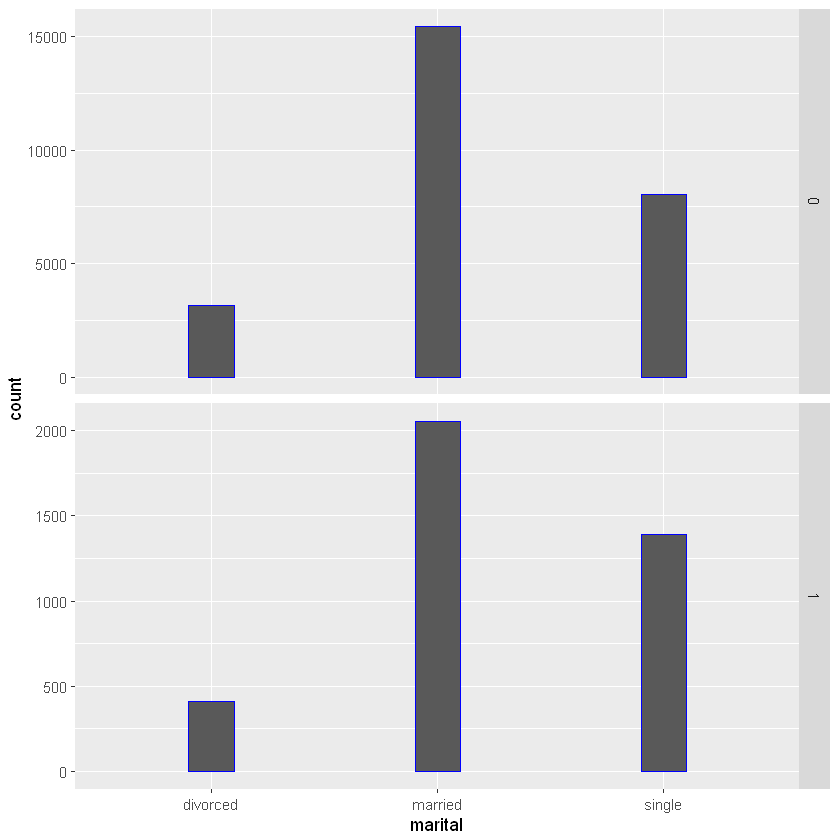

In [33]:
Bankdata %>% ggplot()+aes(x=marital)+geom_bar(col="blue",width=0.2)+facet_grid(y~.,scales="free_y")

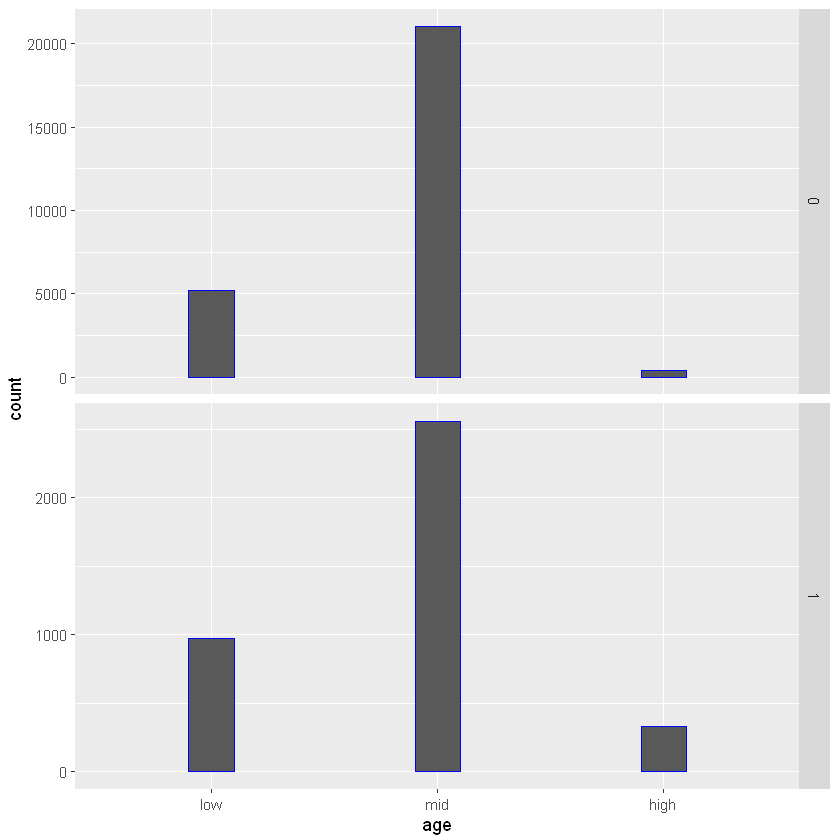

In [34]:
Bankdata %>% ggplot()+aes(x=age)+geom_bar(col="blue",width=0.2)+facet_grid(y~.,scales="free_y")

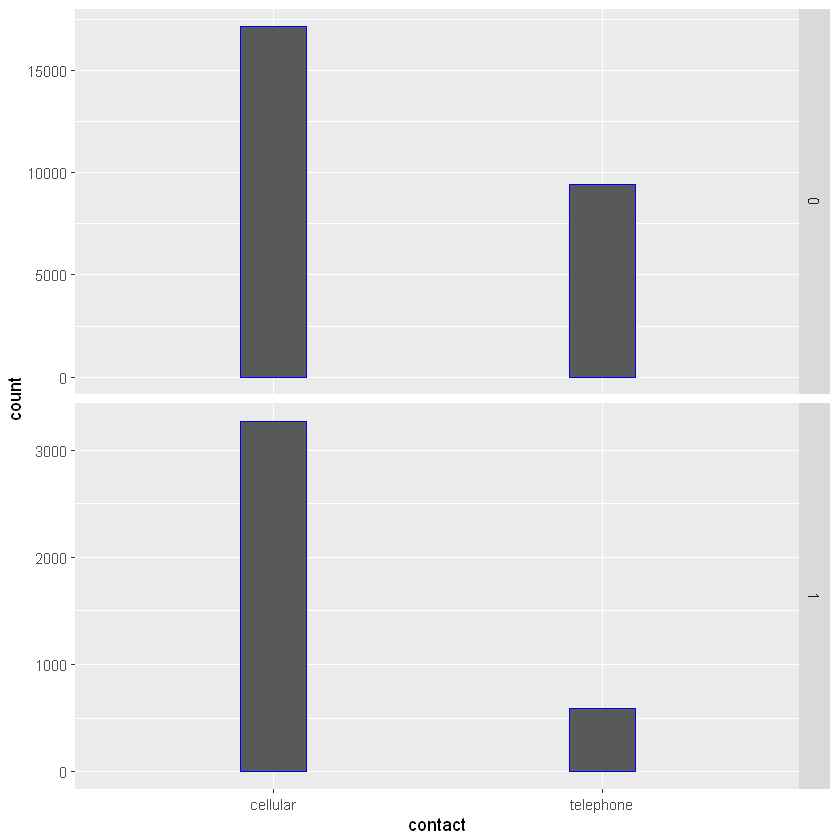

In [35]:
Bankdata %>% ggplot()+aes(x=contact)+geom_bar(col="blue",width=0.2)+facet_grid(y~.,scales="free_y")

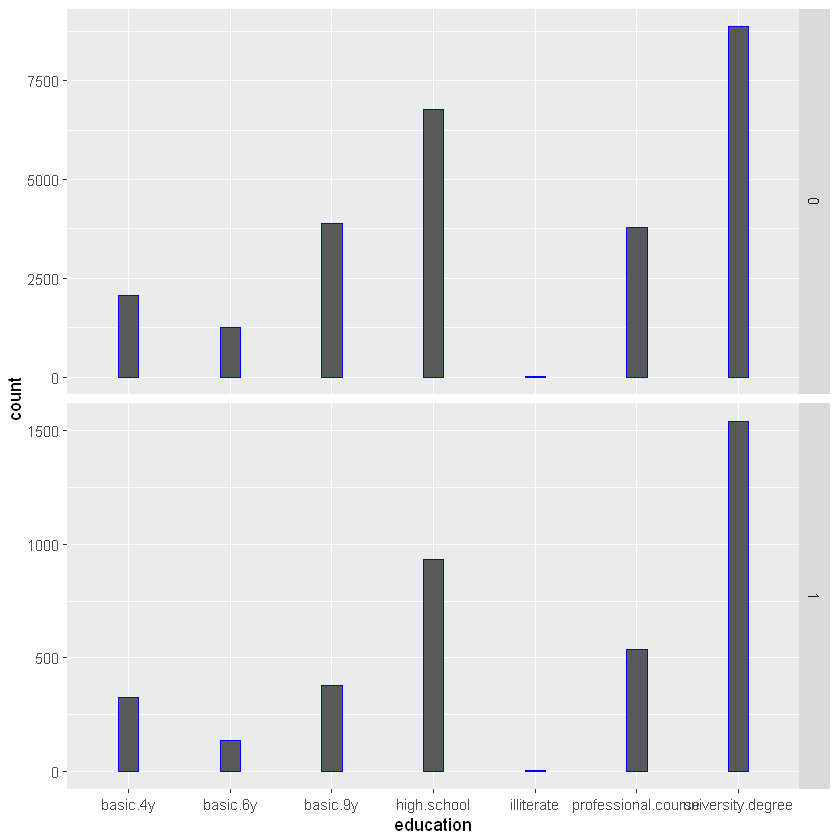

In [36]:
Bankdata %>% ggplot()+aes(x=education)+geom_bar(col="blue",width=0.2)+facet_grid(y~.,scales="free_y")

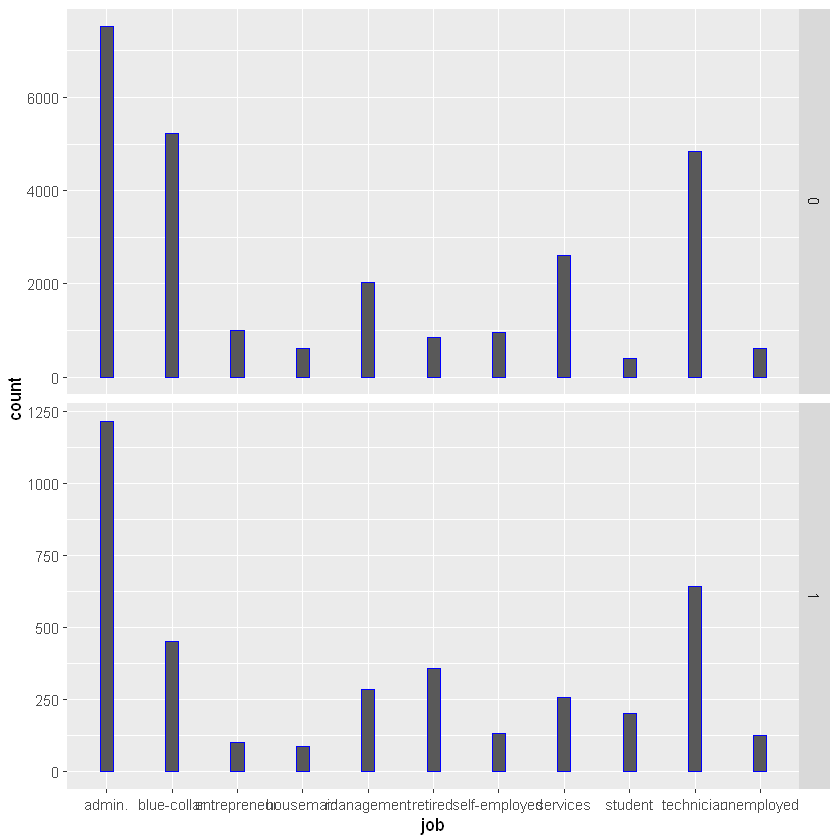

In [37]:
Bankdata %>% ggplot()+aes(x=job)+geom_bar(col="blue",width=0.2)+facet_grid(y~.,scales="free_y")

## Principal Component Analysis (PCA)
### Background Analysis
We conducted Principal Component Analysis (PCA) on the 15 explanatory variables for the unsupervised learning. PCA helps us to find a low dimensional representation of the data that captures most of the information. However, PCA only works on numerical data which most of our X variables consist of categorical data such as marital status, job, education and etc.
<br>
<br>
We have to change categorical data into numerical data in order to perform PCA. For this stage, we just assume that it is of equivalent relevance if the data is changed into numeric data type or else the discussion here can no longer proceed.

Duplicate dataset for PCA testing.

In [38]:
Bankdata.PCA = Bankdata

Remove "y" variable.

In [39]:
Bankdata.PCA = Bankdata.PCA %>% select(-y)

Convert all variables to categorical data.

In [40]:
must_convert<-sapply(Bankdata.PCA,is.factor)
Bankdata_PCA<-sapply(Bankdata.PCA[,must_convert],unclass)
out<-cbind(Bankdata.PCA[,!must_convert],Bankdata_PCA)
out<-data.matrix(Bankdata.PCA)
head(out)
Bankdata.PCA<-data.matrix(Bankdata.PCA)
head(Bankdata.PCA)

age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
2,4,2,1,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,8,2,4,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,1,2,2,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,8,2,4,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,1,2,6,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
1,10,3,6,2,5,1,1,1,1,2,1.1,93.994,4.857,5191


age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
2,4,2,1,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,8,2,4,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,1,2,2,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,8,2,4,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
2,1,2,6,2,5,1,1,1,1,2,1.1,93.994,4.857,5191
1,10,3,6,2,5,1,1,1,1,2,1.1,93.994,4.857,5191


Summary of the data.

In [41]:
apply(Bankdata.PCA,2,summary)

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
Min.,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-3.4000000,92.20100,0.634000,4963.600
1st Qu.,2.000000,1.000000,2.000000,3.000000,1.000000,5.000000,2.00000,1.000000,1.000000,1.000000,2.000000,-1.8000000,93.07500,1.313000,5099.100
Median,2.000000,3.000000,2.000000,4.000000,1.000000,6.000000,3.00000,2.000000,1.000000,1.000000,2.000000,1.1000000,93.44400,4.856000,5191.000
Mean,1.821274,4.716708,2.193191,4.842791,1.329474,6.704966,2.97868,2.397009,1.042968,1.182104,1.925544,-0.0715101,93.52331,3.459938,5160.813
3rd Qu.,2.000000,8.000000,3.000000,7.000000,2.000000,8.000000,4.00000,3.000000,1.000000,1.000000,2.000000,1.4000000,93.99400,4.961000,5228.100
Max.,3.000000,11.000000,3.000000,7.000000,2.000000,12.000000,5.00000,10.000000,2.000000,3.000000,3.000000,1.4000000,94.76700,5.045000,5228.100


Perform principal component analysis.

In [42]:
pr.out=prcomp(Bankdata.PCA,scale=TRUE)
pr.out$sdev
pr.out$center
pr.out$scale
pr.out$rotation

[1] 2.0251831 1.2493739 1.1962202 1.1817486 1.0335016 1.0097446 1.0003249
 [8] 0.9823095 0.9267059 0.8037691 0.7331113 0.5745763 0.2107501 0.1714542
[15] 0.1034576

age            job        marital      education        contact 
     1.8212739      4.7167082      2.1931908      4.8427906      1.3294739 
         month    day_of_week       campaign          pdays       previous 
     6.7049659      2.9786801      2.3970087      1.0429677      1.1821044 
      poutcome   emp.var.rate cons.price.idx      euribor3m    nr.employed 
     1.9255445     -0.0715101     93.5233112      3.4599376   5160.8134086

age            job        marital      education        contact 
     0.4409249      3.6127547      0.6236635      1.9889112      0.4700299 
         month    day_of_week       campaign          pdays       previous 
     2.1347278      1.4074031      1.9907666      0.2027877      0.4560579 
      poutcome   emp.var.rate cons.price.idx      euribor3m    nr.employed 
     0.3834655      1.6103995      0.5853742      1.7772311     75.1580647

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
age,-0.011925940,0.0158200942,-0.08600095,0.660455477,-0.03687091,0.19548262,-0.064089205,0.018290259,-0.195593051,-0.658239746,0.200685397,-0.003506993,0.0054139009,-0.0118819310,-0.001180101
job,-0.010665558,-0.0301304934,0.20658523,-0.062438971,0.12923566,0.79066240,0.191900747,-0.210142750,0.478218895,-0.027144037,0.006519181,0.006358260,-0.0004076586,-0.0073214990,0.000863708
marital,-0.048936976,-0.0242678571,0.16614456,-0.644671605,0.02792225,-0.17277595,0.042730019,-0.004383785,0.058327374,-0.712224463,0.100364430,0.024232771,0.0011716814,-0.0018453776,0.001924124
education,-0.020616355,-0.0211754077,0.42012402,-0.180296506,0.08272737,0.36888278,-0.008208823,0.088386362,-0.790903274,0.114436191,0.022670822,-0.002671806,0.0044319519,-0.0122565868,0.001756674
contact,0.256948739,-0.1622020694,-0.45948039,-0.096315853,0.13398075,0.16055648,0.058870928,-0.090531137,-0.188622483,-0.153576932,-0.636418086,0.399476213,-0.0147173168,0.0148756005,-0.087558794
month,0.003412437,-0.0025939243,0.63577806,0.272955288,0.12942729,-0.24594716,-0.024770286,-0.013938369,0.139489582,-0.115942965,-0.618825077,-0.132116415,0.0127688495,-0.0437209737,-0.088544464
day_of_week,0.002467640,0.0008067521,-0.01099597,-0.075900424,0.18654406,0.06870029,-0.904583171,-0.366487376,0.033416333,0.009600402,0.020770323,-0.018920792,0.0016940290,0.0006594803,0.002796957
campaign,0.104236196,-0.0038051611,-0.02899908,-0.059440396,0.05127575,0.19676247,-0.324844604,0.891266051,0.189419576,-0.027030968,-0.081574859,-0.011224941,0.0001337008,0.0021976822,0.011252258
pdays,-0.199844859,-0.6906556226,0.06857995,0.068838377,0.15953742,-0.08114022,0.002960907,0.044519122,0.040507402,0.046624374,0.133947473,0.200726464,0.6107875589,0.0662345632,-0.009596280
previous,-0.304623534,-0.1756630946,-0.03739773,0.073997623,0.68531822,-0.11697619,0.095615896,0.073758096,0.006849401,0.035353666,0.135767435,0.136240262,-0.5719691874,-0.0775643274,0.009466642


#### Analysis
Graphs below will show why we only take 7 principal components.
##### PC1
The first principal component is weakly correlated to the “emp.var.rate”. Based on the correlation of 0.47126 which is the highest, the first principal component is barely a measure by the “emp.var.rate”.
##### PC2
The second principal component decreases with most of the features. This component can be viewed as a measure of “pdays” with a correlation of 0.69066.
##### PC3
The third principal component is strongly correlated to “month” at 0.63578.
##### PC4
The fourth principal component is strongly correlated to “age” at 0.66046. This component implies that it can be viewed as a measure of “age”. 
##### PC5
The fifth principal component can be viewed as a measure of “previous” with a correlation coefficient of 0.68532.
##### PC6
The sixth principal component is strongly correlated with “job” at 0.79066.
##### PC7
The seventh principal component can be explained by “day_of_week” as it has a strong correlation of 0.90458.
<br>
<br>

We computed the eigenvalues of each principal component.
<br>
Then, we proceeded to calculate the proportion of variance explained (PVE) and carried out the cumulative sum of PVE (CPVE).

In [43]:
pr.var = pr.out$sdev^2
pr.var
pve = pr.var/sum(pr.var)
pve
cumsum(pve)

[1] 4.10136639 1.56093515 1.43094267 1.39652983 1.06812554 1.01958419
 [7] 1.00064997 0.96493186 0.85878387 0.64604476 0.53745221 0.33013796
[13] 0.04441560 0.02939654 0.01070348

[1] 0.2734244258 0.1040623437 0.0953961783 0.0931019884 0.0712083693
 [6] 0.0679722792 0.0667099980 0.0643287906 0.0572522579 0.0430696504
[11] 0.0358301474 0.0220091971 0.0029610398 0.0019597690 0.0007135653

[1] 0.2734244 0.3774868 0.4728829 0.5659849 0.6371933 0.7051656 0.7718756
 [8] 0.8362044 0.8934566 0.9365263 0.9723564 0.9943656 0.9973267 0.9992864
[15] 1.0000000

Plot graph for the result.

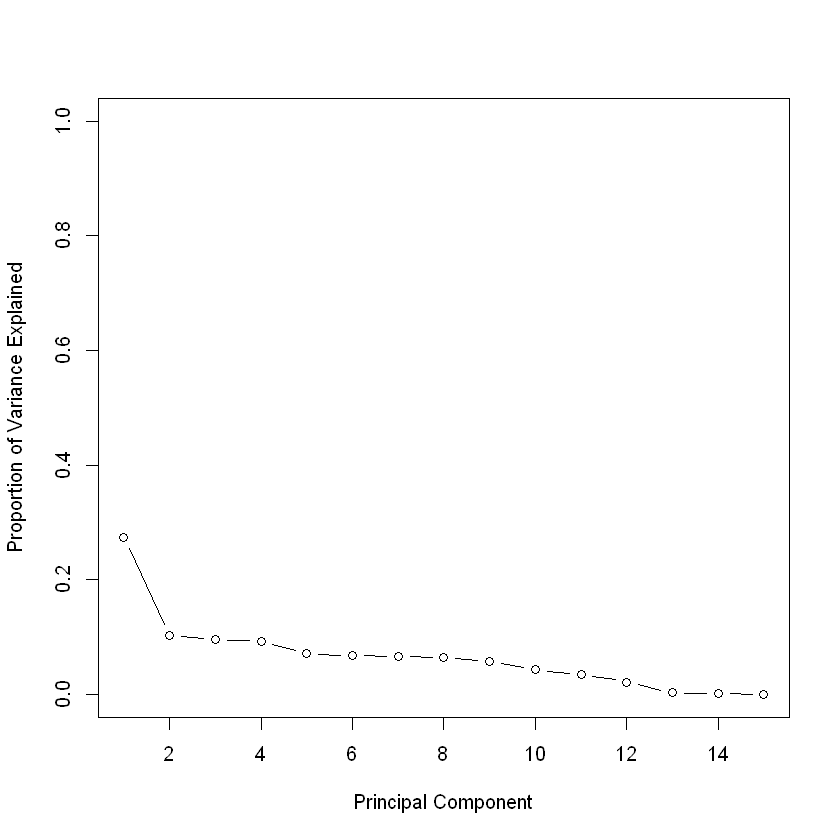

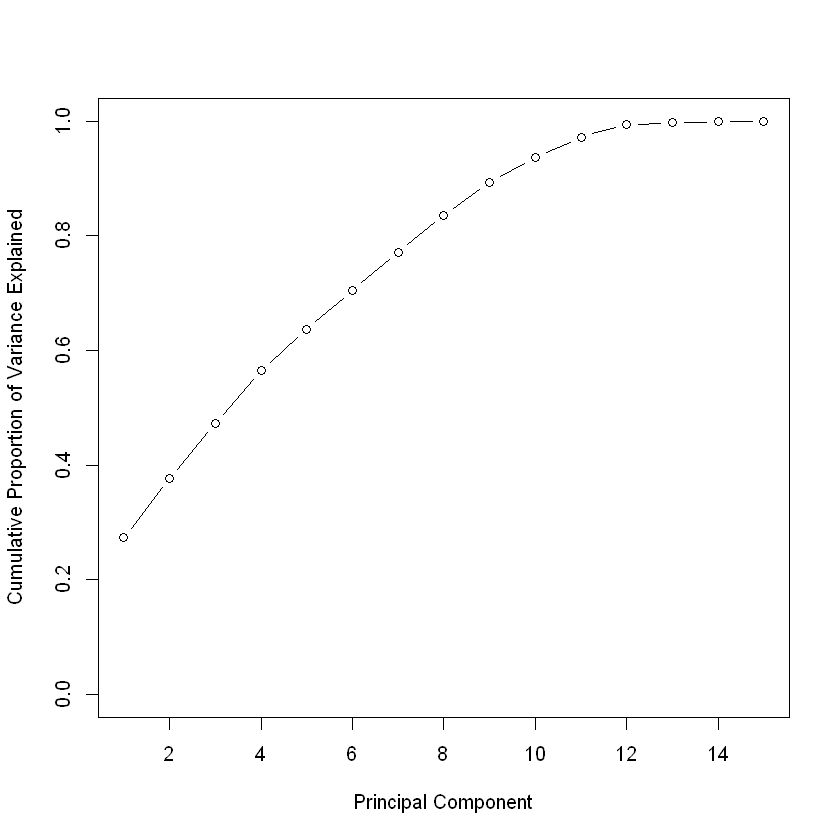

In [44]:
plot(pve, ylim=c(0,1), type = "b", xlab="Principal Component", ylab="Proportion of Variance Explained")
plot(cumsum(pve), ylim=c(0,1), type = "b", xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained")

PCI analysis result.

[1] 30488    15

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0252 1.2494 1.1962 1.1817 1.03350 1.00974 1.00032
Proportion of Variance 0.2734 0.1041 0.0954 0.0931 0.07121 0.06797 0.06671
Cumulative Proportion  0.2734 0.3775 0.4729 0.5660 0.63719 0.70517 0.77188
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.98231 0.92671 0.80377 0.73311 0.57458 0.21075 0.17145
Proportion of Variance 0.06433 0.05725 0.04307 0.03583 0.02201 0.00296 0.00196
Cumulative Proportion  0.83620 0.89346 0.93653 0.97236 0.99437 0.99733 0.99929
                          PC15
Standard deviation     0.10346
Proportion of Variance 0.00071
Cumulative Proportion  1.00000

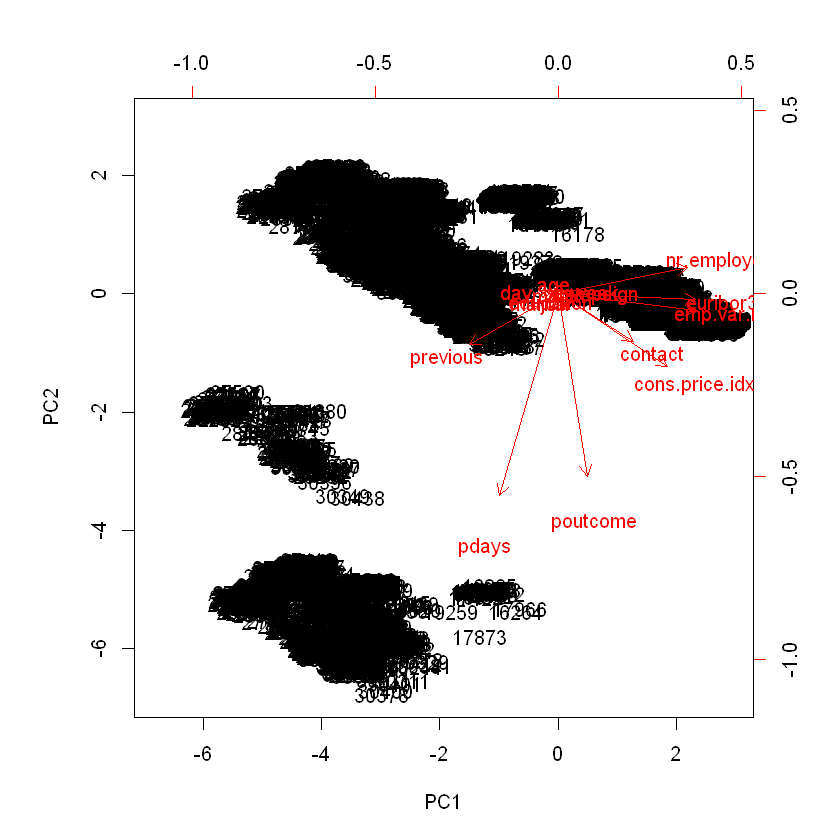

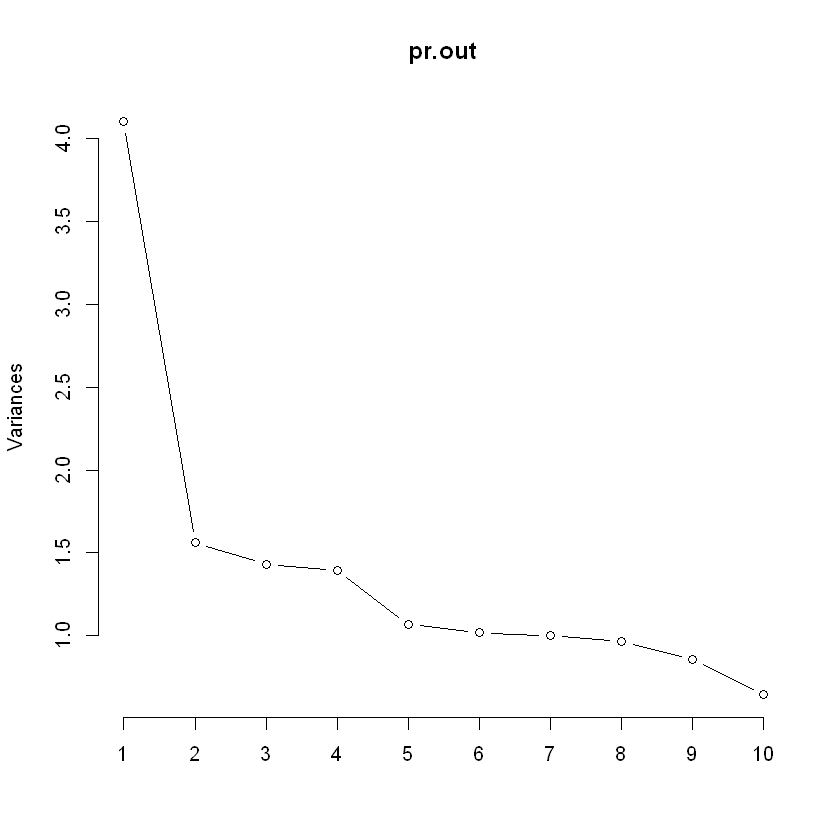

In [45]:
dim(pr.out$x)
biplot(pr.out,scale=0)
summary(pr.out)
screeplot(pr.out, type = "l")

#### Analysis from the graph
we know that with a targeted cumulative proportion of variance explained (CPVE) of 75%, we require first 7 principal components which adds up to 75%.
<br>
<br>
This means that we successfully reduced our dimension from 15 to 7, with these 7 principal components we are able to explain 77% of the outcome of the data consisting of 15 dimensions.
<br>
<br>
Overall, we noticed that PCA does not provide the best solution to our dataset. Since we took the risk of changing the data type, we bear the responsibility of the inaccuracy of the results. However, the outcome of PCA is still satisfactory as it reduces the dimension from 15 to 7 which still can represent 77% of the dataset.

## Stratified sampling

### R library used

Here are the R libraries used in this analysis.

In [46]:
library(splitstackshape)
library(dplyr)

Warning message:
"package 'splitstackshape' was built under R version 3.6.3"


### Split the dataset into two categories, train dataset and test dataset

Create a "id" variable inside the data set.
<br>
Merge the "id" variable with the dataset "Bankdata".

In [47]:
id<-c(1:nrow(Bankdata)) 
NewBank<-data.frame(id, Bankdata) 

Split the "Bankfull_output" into train and test datasets.

In [48]:
set.seed(123)
Bank.train<-stratified(NewBank, "y", size=0.7)
Bank.test<-anti_join(NewBank, Bank.train, by="id")

Review the summary of the train and test set.

In [49]:
summary(Bank.train)

       id          age                 job           marital     
 Min.   :    2   low : 4346   admin.     :6145   divorced: 2476  
 1st Qu.: 7664   mid :16492   blue-collar:4015   married :12267  
 Median :15351   high:  503   technician :3805   single  : 6598  
 Mean   :15304                services   :1956                   
 3rd Qu.:22969                management :1614                   
 Max.   :30488                retired    : 853                   
                              (Other)    :2953                   
               education         contact          month      day_of_week
 basic.4y           :1690   cellular :14358   May    :6837   Mon:4431   
 basic.6y           : 947   telephone: 6983   Jul    :3519   Tue:4201   
 basic.9y           :2975                     Aug    :3248   Wed:4231   
 high.school        :5411                     Jun    :2520   Thu:4460   
 illiterate         :   7                     Nov    :2439   Fri:4018   
 professional.course:3044         

In [50]:
summary(Bank.test)

       id          age                job           marital    
 Min.   :    1   low :1829   admin.     :2592   divorced:1077  
 1st Qu.: 7490   mid :7095   technician :1668   married :5225  
 Median :15020   high: 223   blue-collar:1660   single  :2845  
 Mean   :15107               services   : 901                  
 3rd Qu.:22638               management : 697                  
 Max.   :30483               retired    : 363                  
                             (Other)    :1266                  
               education         contact         month      day_of_week
 basic.4y           : 690   cellular :6085   May    :2896   Mon:1848   
 basic.6y           : 442   telephone:3062   Jul    :1562   Tue:1754   
 basic.9y           :1301                    Aug    :1425   Wed:1894   
 high.school        :2288                    Jun    :1094   Thu:1935   
 illiterate         :   4                    Nov    :1057   Fri:1716   
 professional.course:1277                    Apr    : 61

## Naive Bayes
Naïve Bayes Classifier is one common approach based on estimating the distribution of the data and then plugging this into the Bayes classifier. It is simple and fast to predict classes of test dataset and even perform well in multi class prediction which contains large dimensional data sets such as text analytics. Moreover, when the conditional independence assumption
holds, Naïve Bayes classifier will converge quicker than other models like logistic regression and with less training data.

Library needed for Naive Bayes testing.

In [51]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"


### Data Preparation for Naive Bayes

Duplicate train and test set for Naive Bayes purpose.

In [52]:
BA.NB.train <- Bank.train
BA.NB.test <- Bank.test

Data type checking.

In [53]:
str(BA.NB.train)

Classes 'data.table' and 'data.frame':	21341 obs. of  17 variables:
 $ id            : int  20033 20103 27537 3079 1887 28593 3477 12212 4917 6995 ...
 $ age           : Factor w/ 3 levels "low","mid","high": 2 1 2 2 2 3 1 2 2 2 ...
 $ job           : Factor w/ 11 levels "admin.","blue-collar",..: 10 1 6 7 10 6 2 5 2 5 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 3 1 2 2 2 3 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 6 7 7 4 4 3 4 7 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 2 2 2 2 1 2 2 ...
 $ month         : Factor w/ 12 levels "Jan","Feb","Mar",..: 4 4 8 5 5 12 5 7 5 6 ...
 $ day_of_week   : Factor w/ 5 levels "Mon","Tue","Wed",..: 3 4 3 3 3 3 1 4 5 3 ...
 $ campaign      : Factor w/ 10 levels "1","2","3","4",..: 1 3 1 2 2 2 4 1 4 4 ...
 $ pdays         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ previous      : Factor w/ 3 levels "0","1","2+": 1 1 2 1 1 1 1 1 1 1 ...
 $ poutcome   

Perform Naive Bayes testing.

In [54]:
naive.model <- naiveBayes(y~.-id, data = BA.NB.train)

Construct a confusion matrix for Naive Bayes testing.

In [55]:
naive.pred <- predict(naive.model, newdata = BA.NB.test)
naive.perform <- table(naive.pred, BA.NB.test$y)
naive.perform

          
naive.pred    0    1
         0 6694  415
         1 1295  743

Measurement for Naive Bayes testing.

In [56]:
naive.Accuracy <- sum(naive.perform[1,1],naive.perform[2,2]) / sum(naive.perform[,])
naive.Recall.P <- naive.perform[1,1] / sum(naive.perform[,1])
naive.Recall.N <- naive.perform[2,2] / sum(naive.perform[,2])
naive.Precision.P <- naive.perform[1,1] / sum(naive.perform[1,])
naive.Precision.N <- naive.perform[2,2] / sum(naive.perform[2,])

Result.

In [57]:
naive.Accuracy
naive.Recall.P
naive.Recall.N
naive.Precision.P
naive.Precision.N

[1] 0.8130535

[1] 0.8379021

[1] 0.6416235

[1] 0.9416233

[1] 0.3645731

#### Comment on Naïve Bayes Classifier method
We know that the Naïve Bayes classifier is a product of density functions with prior probability. The problem arises when there exists a density function with zero density, thus making the posterior probability zero no matter what is the value of other density functions, in that sense, Naïve Bayes classifier fails. Besides that, the shortfall for Naïve Bayes classifier is the assumption of independent variables which is not applicable in the real-world scenario. For this reason, it is known as a bad estimator, when the attributes of a dataset are huge. The Naïve Bayes classifier gives an accuracy of 81.31% which is the lowest among all.

## Logistic Regression
Logistic Regression model is very much like linear regression but with a binomial response variable. It is widely used in practical because of the model's interpretability. It helps to describe the relationship between the dependent variable and independent variables. The noticeable characteristics of logistic regression is that it models the chance of the outcome depending on individual features which makes it an advantage to avoid confounding effects by analyzing the association of all variables together.

### Data Preparation for Logistic Regression

Duplicate train and test set for Logistic Regression testing purpose.

In [58]:
LR.train <- Bank.train
LR.test <- Bank.test

Perform Logistic Regression.

In [59]:
logistic = glm(y ~ .-id, data = LR.train, family = "binomial")

Summary of the Logistic Regression.

In [60]:
summary(logistic)


Call:
glm(formula = y ~ . - id, family = "binomial", data = LR.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0165  -0.4140  -0.3284  -0.2643   2.9127  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.320e+02  3.349e+01  -3.941 8.12e-05 ***
agemid                       -1.200e-01  6.393e-02  -1.876 0.060602 .  
agehigh                      -1.128e-02  1.575e-01  -0.072 0.942936    
jobblue-collar               -9.861e-02  9.416e-02  -1.047 0.294961    
jobentrepreneur               3.874e-03  1.400e-01   0.028 0.977915    
jobhousemaid                  1.877e-02  1.745e-01   0.108 0.914372    
jobmanagement                -3.367e-02  9.644e-02  -0.349 0.727041    
jobretired                    2.119e-01  1.386e-01   1.529 0.126297    
jobself-employed             -7.653e-02  1.327e-01  -0.577 0.564057    
jobservices                  -1.520e-01

Remark: We noticed that there are some variable that can be further removed to lighten the model.
<br>

Variables are to be removed such as "education", "marital", "campaign", "nr.employed". 

In [61]:
logistic = glm(y ~ .-education-marital-campaign-nr.employed-id, data = LR.train, family = "binomial")

Summary of the Logistic Regression.

In [62]:
summary(logistic)


Call:
glm(formula = y ~ . - education - marital - campaign - nr.employed - 
    id, family = "binomial", data = LR.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0223  -0.4110  -0.3288  -0.2648   2.8039  

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.552e+02  1.173e+01 -13.229  < 2e-16 ***
agemid              -1.137e-01  5.947e-02  -1.913 0.055794 .  
agehigh             -3.066e-02  1.529e-01  -0.200 0.841103    
jobblue-collar      -2.415e-01  7.631e-02  -3.165 0.001551 ** 
jobentrepreneur     -2.241e-02  1.386e-01  -0.162 0.871547    
jobhousemaid        -4.668e-02  1.677e-01  -0.278 0.780679    
jobmanagement       -9.726e-03  9.439e-02  -0.103 0.917924    
jobretired           1.676e-01  1.330e-01   1.260 0.207709    
jobself-employed    -6.760e-02  1.312e-01  -0.515 0.606307    
jobservices         -2.224e-01  9.592e-02  -2.319 0.020395 *  
jobstudent    

Construct a confusion matrix for Logistic Regression.

In [63]:
options(warn=-1) #turn off warning message
log.prob<-predict(logistic, newdata=subset(LR.test,select=c(1:16)), type='response')
log.pred<-ifelse(log.prob>= 0.5, "pred_1","pred_0")
log.perform<-table(log.pred,LR.test$y)

Measurement for Logistic Regression.

In [64]:
log.perform
log.Accuracy <- sum(log.perform[1,1],log.perform[2,2])/sum(log.perform[,])
log.Recall.P <- log.perform[1,1]/sum(log.perform[,1])
log.Recall.N <- log.perform[2,2]/sum(log.perform[,2])
log.Precision.P <- log.perform[1,1]/sum(log.perform[1,])
log.Precision.N <- log.perform[2,2]/sum(log.perform[2,])

        
log.pred    0    1
  pred_0 7865  870
  pred_1  124  288

Result.

In [65]:
log.Accuracy 
log.Recall.P 
log.Recall.N
log.Precision.P 
log.Precision.N 

[1] 0.8913305

[1] 0.9844787

[1] 0.2487047

[1] 0.9004007

[1] 0.6990291

#### Comment on Logistic Regression method
Logistic regression can suffer from complete separation. If there is a feature that would perfectly separate the two classes, in this case, the model can no longer be trained due to the divergence properties of that feature as the optimal weight would be infinite. Despite the downfall, this model has an accuracy of 89.11% that is the highest among the rest. Hence, we accept the logistic regression model to be our best choice.

## Decision Tree

Decision Tree is a decision support tool mostly used in classification problems that is easy to understand and interpret as it helps to display data graphically in a tree-like structure consisting of branches, leaves and nodes. Apart from that, decision trees can easily handle qualitative predictors without creating dummy variables in addition to handling missing values in predictors and are robust to error.
<br>

Library needed for tree model testing.

In [66]:
library(tree)

Plot the decision tree graph

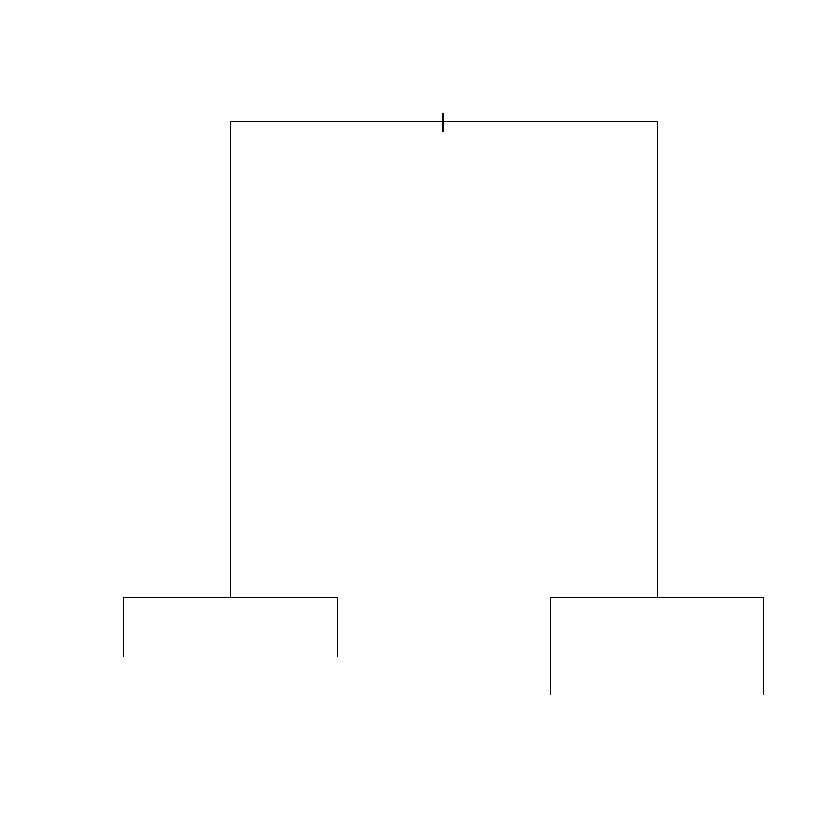

In [67]:
tree=tree(y~.-id,Bank.train)
plot(tree)

Perform Decision Tree testing prediction.

In [68]:
tree.pred=predict(tree,Bank.test,type="class")

Preview the summary of the prediction.

In [69]:
summary(tree.pred)

0    1 
8849  298

Construct the confusion matrix for Decision Tree testing.

In [70]:
table(tree.pred,Bank.test$y)
#or
tree.perform=table(tree.pred,Bank.test$y)
tree.perform

         
tree.pred    0    1
        0 7903  946
        1   86  212

         
tree.pred    0    1
        0 7903  946
        1   86  212

Accuracy and Error.

In [71]:
tree.Accuracy= mean(tree.pred==Bank.test$y)
tree.Accuracy
tree.Error= mean(tree.pred!=Bank.test$y)
tree.Error

[1] 0.8871761

[1] 0.1128239

Measurement for Decision Tree.

In [72]:
tree.Recall.P=tree.perform[1,1]/sum(tree.perform[,1])
tree.Recall.N= tree.perform[2,2]/sum(tree.perform[,2])
tree.Precision.P=tree.perform[1,1]/sum(tree.perform[1,])
tree.Precision.N=tree.perform[2,2]/sum(tree.perform[2,])

Result.

In [73]:
tree.perform
tree.Accuracy
tree.Recall.P
tree.Recall.N
tree.Precision.P
tree.Precision.N

         
tree.pred    0    1
        0 7903  946
        1   86  212

[1] 0.8871761

[1] 0.9892352

[1] 0.1830743

[1] 0.8930953

[1] 0.7114094

#### Comment on Decision Tree method
The decision trees are unstable as they produce dramatically different trees from slightly different train sets resulting in a high variance. Despite all the causes, the decision tree has the accuracy of 88.72%. However, it does have the same level of predictive accuracy as other methods.

## Random Forest
Random Forest is a model which consists of a large number of individual decision trees that serve as ensembles. The algorithm of random forest is that at each tree split, a random sample of m attributes is drawn, and only those m attributes are taken into consideration for splitting. In other words, each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

Library needed for Random Forest testing.

In [74]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




### Data Preparation for Random Forest

Duplicate train and test set for Linear Discriminant Analysis.

In [75]:
RF.train <- Bank.train
RF.test <- Bank.test

In [76]:
rf=randomForest(y~.-id,data=RF.train,mtry=2,importance=TRUE)
rf


Call:
 randomForest(formula = y ~ . - id, data = RF.train, mtry = 2,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 11.08%
Confusion matrix:
      0   1 class.error
0 18285 355  0.01904506
1  2009 692  0.74379859

Make prediction and construct confusion matrix.

In [77]:
importance(rf)
rf.pred<-predict(rf,newdata=RF.test,type='response')
rf.pred
rf.perform<-table(rf.pred,RF.test$y)
rf.perform

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,14.780231,-3.122746,14.147448,63.42801
job,29.382771,-4.942338,25.060301,188.92572
marital,10.707732,-5.446481,6.443155,61.00485
education,22.882725,-2.632681,20.526697,121.02528
contact,9.352643,15.412599,10.768589,51.65801
month,29.177959,-18.545432,29.108291,180.50085
day_of_week,18.879597,2.441204,18.712808,129.03103
campaign,6.793904,9.308917,10.915695,133.19685
pdays,6.886145,24.706005,19.591805,122.46594
previous,7.643968,8.674521,10.017966,56.29260


1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   0    0    0    0    0    0    0

       
rf.pred    0    1
      0 7826  855
      1  163  303

Measurement for Random Forest testing.

In [78]:
rf.Accuracy = sum(rf.perform[1,1],rf.perform[2,2])/sum(rf.perform[,])
rf.Error = sum(rf.perform[1,2],rf.perform[2,1])/sum(rf.perform[,])
rf.Precision.P = rf.perform[1.1]/sum(rf.perform[1,])
rf.Precision.N = rf.perform[2,2]/sum(rf.perform[2,])
rf.Recall.P = rf.perform[1,1]/sum(rf.perform[,1])
rf.Recall.N = rf.perform[2,2]/sum(rf.perform[,2])

Result.

In [79]:
rf.Accuracy
rf.Error
rf.Precision.P
rf.Precision.N
rf.Recall.P
rf.Recall.N

[1] 0.8887067

[1] 0.1112933

[1] 0.901509

[1] 0.6502146

[1] 0.9795969

[1] 0.261658

#### Comment on Random Forest method
In our dataset, the random forest model gave an accuracy of 88.87%.

## Summary of result

We summarized all the method's result into the table below:
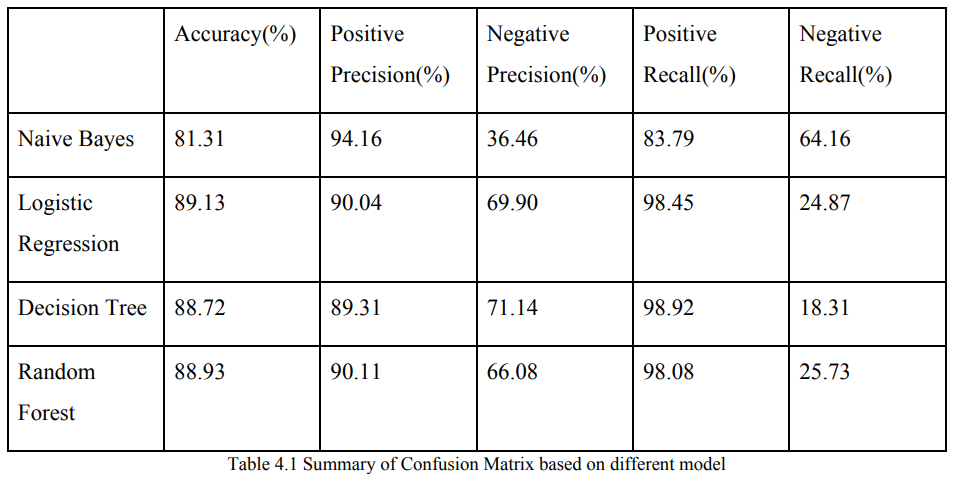

From the table above, we happened to notice that all the models that we built to test the dataset have an accuracy of above 80%. With the consistency of the results generated, we inferred that this dataset we are using is reliable as the sample or historical record to predict whether the client will subscribe to a term deposit. 
<br>
<br>
As we can observe from the table, Logistic Regression carries the highest accuracy of 89.13% among the models. This model not only has high accuracy but also high positive precision and positive recall which means that this model is able to capture a lot of positive predictions at which most of the time the positive predictions are captured correctly. 
<br>
<br>
However, the Logistic Regression model has low negative precision and negative recall. This implies that 69.90% of the negative prediction will be correct with the negative capture rate of 24.87%. Even though the outcome might seem unsatisfactory, we can observe that similar trends can be found for other models as well. This might be due to the biases of the data for many outcomes to be “0” in variable y at about 87.3%. 
<br>
<br>
By considering all factors, we select the Logistic Regression model for the dataset, with the advantage of significantly high sensitivity and low specificity.

## Conclusion and Recommendation
As a conclusion, we had chosen a marketing dataset with 41188 observations with 21 variables. After getting rid of the rows containing null value, we applied the correlation to determine how highly correlated that the variables with the response variable “y” as well as performing the statistical test of the necessary variables. Eventually, we came to include the variables “age”, “job”, “marital”, “education”, “contact”, “month”, “day of week”, “campaign”, “pdays”, “previous”, “poutcome”, “emp.var.rate”, “cons.price.idx”, “euribor3m” and “nr.employed”.
<br>
<br>
We performed 4 predictive models to test the dataset which were Decision Tree, Logistic Regression, Naïve Bayes Classifier and Random Forest. Among all of them, the Logistic Regression model has the highest accuracy of 89.13%. We came to conclude that Logistic Regression is the best fit model for the marketing dataset.
<br>
<br>
We suggest performing cross-validation for the dataset before fitting it into the models to avoid the biases of the results. There are 2 kinds of cross-validations namely k-fold cross validation and leave-one-out cross validation (LOOCV). The k-fold cross-validation method evaluates the model performance on different subsets of the training data and then calculates the average prediction error rate. While the LOOCV is the special case of k-fold cross validation with only one sample being held out at a time. The reason we suggest doing cross-validation is because a single split validation does not provide sufficient statistics for the effectiveness of the classifier in the context of statistics.
<br>
<br>
Moreover, based on understanding of the dataset, the Group 3 variables are assumed to have great effects on the subscription rate. Since ‘nr.employed’ has a positive effect on subscription, it is suggested that the bank should hire more employees to work for them to boost subscription. Also, ‘euribor3m’ affects customer’s decision on subscription, therefore the bank is suggested to introduce this campaign during times of high interest rate and stability of macroeconomic environment.